<a href="https://colab.research.google.com/github/IGiovanniRamirez/Giovanni-Ramirez-Data-Portfolio/blob/main/traffic-gdp-analysis/mobility_economy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**.
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')

In [ ]:
# mostrar las primeras 5 filas de traffic
traffic.head()

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [ ]:
# mostrar las primeras 5 filas de eco
eco.head()

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [ ]:
# Examinar la estructura de traffic
traffic.info()
traffic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTCWeekAgo`son de tipo object (texto) y deben quedar como tipo de datos fecha (datetime64[ns]) por lo que requieren conversion
- En la impresion de las 5 primeras filas del DF Traffic no se observan columnas con datos ausentes, sin embargo, en la columna `MinsDelay`se ven valores negativos, habra que revisar ese punto posteriormente pues minutos de retraso negativos no parece logico. Se podría aplicar también una estandarización de texto a la columna `City`a formato de título con .str.title(), para que el nombre de cada ciudad inicie con mayúscula

In [ ]:
# Examinar la estructura de eco
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, ` PM2.5 (μg/m³)` y `Population (M)` tienen tipo de datos object (texto) por lo que requieren conversión, al dar una inspección a los números contenidos en estas columnas se puede ver que todas deberían tener formato float64 porque contienen decimales.
- En la impresión de las 5 primeras filas del DF eco no se observan columnas con datos ausentes, se podría aplicar también una estandarización de texto a la columna `City`a formato de título con .str.title(), para que el nombre de cada ciudad inicie con mayúscula

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [ ]:
# Estandarizar los nombres de las columnas de traffic
traffic= traffic.rename(columns={'Country':'country','City':'city','UpdateTimeUTC':'update_time_utc','JamsDelay':'jams_delay','TrafficIndexLive':'traffic_index_live','JamsLengthInKms':'jams_length_in_kms','JamsCount':'jams_count','TrafficIndexWeekAgo':'traffic_index_week_ago','UpdateTimeUTCWeekAgo':'update_time_utc_week_ago','TravelTimeLivePer10KmsMins':'travel_time_live_per_10_kms_mins','TravelTimeHistoricPer10KmsMins':'travel_time_historic_per_10_kms_mins','MinsDelay':'mins_delay'})

# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10_kms_mins',
       'travel_time_historic_per_10_kms_mins', 'mins_delay'],
      dtype='object')

In [ ]:
# Estandarizar los nombres de las columnas de eco
eco= eco.rename(columns={'Year':'year','City':'city','Country':'country','City GDP/capita':'city_gdp_capita','Unemployment %':'unemployment_pct','PM2.5 (μg/m³)':'pm_25','Population (M)':'population_m'})

# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm_25', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


In [ ]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] =pd.to_datetime(traffic["update_time_utc"], errors="coerce", utc=True)
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic["update_time_utc_week_ago"], errors="coerce", utc=True)

# verificar el cambio
traffic.info()
traffic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                                Non-Null Count    Dtype              
---  ------                                --------------    -----              
 0   country                               1004464 non-null  object             
 1   city                                  1004464 non-null  object             
 2   update_time_utc                       1004464 non-null  datetime64[ns, UTC]
 3   jams_delay                            1004464 non-null  float64            
 4   traffic_index_live                    1004464 non-null  float64            
 5   jams_length_in_kms                    1004464 non-null  float64            
 6   jams_count                            1004464 non-null  float64            
 7   traffic_index_week_ago                1004464 non-null  float64            
 8   update_time_utc_week_ago              1004464 non-null  datetime64[ns, U

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001000+00:00,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30+00:00,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00+00:00,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001000+00:00,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30+00:00,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30+00:00,8.196278,8.196510,-0.000232


In [ ]:
# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype('string').str.replace('.','').str.replace(',','.').str.strip().astype('float')
eco['unemployment_pct'] = eco['unemployment_pct'].astype('string').str.replace('%','').str.replace(',','.').str.strip().astype('float')
eco['population_m'] = eco['population_m'].astype('string').str.replace(',','.').str.strip().astype('float')

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco['population_m']*1000000

# verificar el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm_25             30 non-null     object 
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm_25,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13.6,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [ ]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = pd.to_datetime(traffic['update_time_utc']).dt.year

# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001000+00:00,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30+00:00,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00+00:00,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001000+00:00,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30+00:00,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30+00:00,8.196278,8.196510,-0.000232,2025


In [ ]:
# Filtra los registros del año 2024
traffic_2024 = traffic[(traffic['year']==2024)].copy()
eco_2024 =  eco[(eco['year']==2024)].copy()


# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30+00:00,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001000+00:00,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30+00:00,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30+00:00,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30+00:00,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30+00:00,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001000+00:00,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001000+00:00,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00+00:00,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00+00:00,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm_25,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3.9,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


In [ ]:

# Calcular los  promedios de trafico por ciudad, país y año
traffic_city_year_2024 =  (traffic_2024.groupby(['city','country','year'])[['jams_delay','traffic_index_live','jams_length_in_kms','jams_count', 'mins_delay','travel_time_live_per_10_kms_mins','travel_time_historic_per_10_kms_mins']].mean().reset_index())


# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [ ]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)# tu código aquí

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es ciudad de México con 2833.06 mins.


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [ ]:


# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_in_kms','jams_count','mins_delay',
             'travel_time_live_per_10_kms_mins','travel_time_historic_per_10_kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm_25','population']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()



# Unir datasets
merged = pd.merge(traffic_2024_small, eco_2024_small, on=['city', 'year'], how='inner')

# Mostrar las primeras 5 filas
merged.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,city_gdp_capita,unemployment_pct,pm_25,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,11124.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,11442.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,16251.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,18117.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,12381.0,8.2,"13,50",3700000.0



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

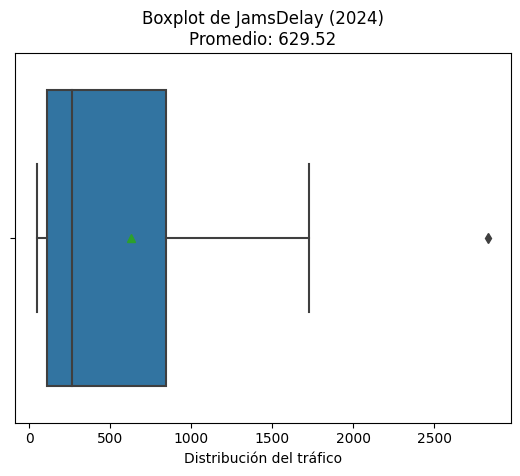

In [ ]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
sns.boxplot(data=merged, x='jams_delay', showmeans=True)

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.xlabel('Distribución del tráfico')
plt.show()


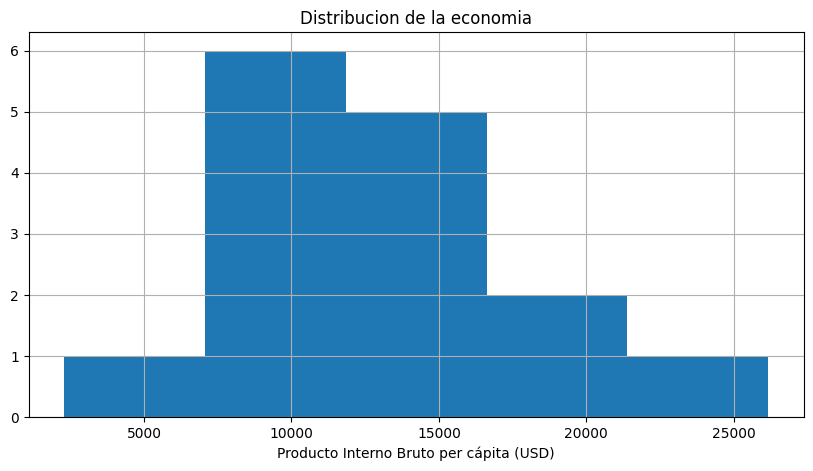

In [ ]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)

merged['city_gdp_capita'].hist(bins=5, figsize=(10,5))
plt.title ('Distribucion de la economia')
plt.xlabel('Producto Interno Bruto per cápita (USD)')
plt.show()

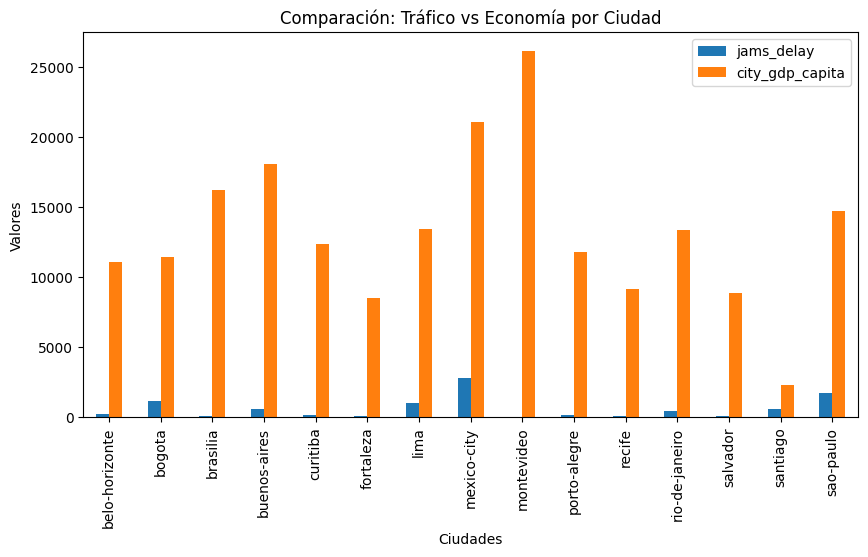

In [ ]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad

merged.plot(x='city', y=['jams_delay', 'city_gdp_capita'],kind='bar',figsize=(10,5))
plt.title ('Comparación: Tráfico vs Economía por Ciudad')
plt.ylabel('Valores')
plt.xlabel('Ciudades')
plt.xticks(rotation=90)
plt.show()

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

Escribe tus comentarios:
1. En el gráfico tipo Boxplot se ve que hay una ciudad con valor de distribución del tráfico extremo (outlier), este punto podrían indicar un posible error de medición o problemas extremos en la demora del tráfico por lo que sería evidente la necesidad de diseñar un plan de trabajo para mejorar ese tiempo.
2. En el histograma puede verse que la mayoría de los datos tienden en un rango de entre 7.000 a 12.000 USD y su distribución es simétrica.
3. En el gráfico de barras no se ve una relación clara entre la congestión vehicular y el PIB, por lo que se ve en el gráfico podría decirse que no tienen relación.


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [ ]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información.


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?
- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.
  
**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?


# Respuestas

#### Contexto & objetivo:

1. Con los datos visualizados en las gráficas no se ve una relación directa entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita), por ejemplo, ciudad de México tiene el mayor promedio de demoras en congestión vehicular y el segundo valor más alto de PIB per cápita, pero en contraste Montevideo tiene el más alto PIB per cápita, pero uno de los valores mas bajos en congestión, por lo que se confirma que no tienen relación estas dos variables.
2. Las variables clave utilizadas fueron las demoras en el tráfico (jams_delay) y el PIB per cápita (city_gdp_capita) para a partir de allí   validar si existían ciudades prioritarias con requerimientos de inversión para mejorar la movilidad, sin embargo, como se explicó en el punto anterior no se ve una relación entre las dos variables por lo que no se puede sugerir algún plan de inversión basados únicamente en esa información.

#### Cobertura de datos:

1. Con el Data Frame final después de realizado el merge, se analizo únicamente el año 2024, 15 ciudades y 7 países


#### Metodología (alto nivel):

1.	La limpieza de datos inicio renombrando las columnas de ambos Data Frame tanto de “traffic” como de “eco”, para dejarlas todas en formato snake_case, luego dentro del DF “traffic” se convirtió a formato de fecha a las columnas “update_time_utc” y “update_time_utc_week_ago”. Posteriormente dentro del DF “eco” se eliminaron comas, símbolos de porcentaje y separadores de miles, para luego convertir a formato de numero float los datos de las columnas “city_gdp_capita”, “unemployment_pct” y “population_m”, incluso de esta ultima se genero una nueva columna llamada “population” donde se multiplico por 1.000.000 para obtener el número de población en millares. Por ultimo en el DF “traffic” se extrajo el año de la columna “update_time_utc” y se filtraron ambos DF por el año 2024 generando dos DF nuevos “traffic_2024” y “eco_2024”
2.	En este punto se agrupo el DF “traffic_2024” por las columnas 'city', 'country' y 'year', se calcularon promedios de todas sus columnas numéricas con la ayuda de la función mean() y se reiniciaron índices con reset_index(), generando otro nuevo DF llamado “traffic_city_year_2024”. Por último se seleccionaron solo las columnas clave de tráfico y economía generado dos DF nuevos “traffic_2024_small” y  “eco_2024_small”, con estos últimos dos DF se realizo una unión INNER con las columnas clave 'city' y 'year' para mantener solo las ciudades y años presentes en ambos datasets, utilizando la función pd.merge(), para obtener nuestro DF final “merged” con lo cual ya teníamos integrado tanto el tráfico y la economía en un solo dataset.
3.	Se emplearon 3 validaciones visuales  como lo son un grafico de caja, un histograma y un grafico de barras integrado, En el gráfico tipo Boxplot se ve que hay una ciudad con valor de distribución del tráfico extremo (outlier), este punto podría indicar un posible error de medición o problemas extremos en la demora del tráfico por lo que sería evidente la necesidad de diseñar un plan de trabajo para mejorar ese tiempo, en el histograma puede verse que la mayoría de los datos tienden en un rango de entre 7.000 a 12.000 USD y su distribución es simétrica y  en el gráfico de barras se concluye que no hay una relación clara entre la congestión vehicular y el PIB.

#### Hallazgos iniciales:

1. El nivel de congestión no depende directamente del nivel de riqueza, sino más bien de: Tamaño poblacional, Estructura urbana, Dependencia del automóvil, Calidad del transporte público y Planeación histórica de la ciudad
2. Outliers claros: Ciudad de México, máximo PIB y máxima congestión, impacto económico y ambiental muy alto, São Paulo segunda mayor congestión, Santiago PIB per cápita anormalmente bajo frente a su nivel de desarrollo, requiere validación de fuente o definición del indicador.
3. Ciudades prioritarias para intervención: a la luz únicamente de la alta congestión vehicular pues como se mencionó antes no se ve una relación directa con el PIB serían; Ciudad de México, São Paulo, Bogotá y Lima, sugiriendo hacer una optimización de semáforos con datos en tiempo real, carriles exclusivos y expansión de transporte masivo, incentivos al teletrabajo y horarios escalonados, restricciones de circulación vehicular por matrículas.

#### Conclusión

En Latinoamérica, la congestión no es un reflejo directo del nivel de ingreso, sino de cómo crecen y se gestionan las ciudades. Las mayores oportunidades están en megaciudades donde cada hora perdida tiene un alto costo económico. La evidencia sugiere que invertir en movilidad inteligente genera retornos claros en productividad, salud y competitividad urbana.